Import necessary libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

Load the dataset

In [219]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")

Understanding the data

In [220]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [221]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [222]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [223]:
df.duplicated().sum()

0

In [224]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [226]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Drop 'CustomerID' column as it is not necessary

In [227]:
df.drop(columns='CustomerID', inplace=True)

Label encoding

In [228]:
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])

Create new categorical columns based on existing features

In [229]:
df['Income_Range'] = pd.cut(df['Annual Income (k$)'], bins=[0, 50, 100, np.inf], labels=['Low', 'Medium', 'High'])
df['Score_Range'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 30, 65, np.inf], labels=['Low', 'Medium', 'High'])
df['Age_group'] = pd.cut(df['Age'], bins=[0, 25, 60, np.inf], labels=['Low', 'Adult', 'Senior'])

In [230]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Income_Range,Score_Range,Age_group
0,1,19,15,39,Low,Medium,Low
1,1,21,15,81,Low,High,Low
2,0,20,16,6,Low,Low,Low
3,0,23,16,77,Low,High,Low
4,0,31,17,40,Low,Medium,Adult
...,...,...,...,...,...,...,...
195,0,35,120,79,High,High,Adult
196,0,45,126,28,High,Low,Adult
197,1,32,126,74,High,High,Adult
198,1,32,137,18,High,Low,Adult


Drop original continuous columns

In [231]:
df.drop(columns=['Annual Income (k$)','Spending Score (1-100)','Age'],inplace=True)

Encoding for categorical columns

In [232]:
lst=[]
for i in df:
  if df[i].dtype==object and df[i].nunique()<=2:
    lst.append(i)
lst

[]

In [233]:
lst=['Genre']
dict1={}
for i in lst:
  dict1[i]=LabelEncoder()
  df[i]=dict1[i].fit_transform(df[i])

In [234]:
onehot=OneHotEncoder(sparse_output=False,drop='first')
res=onehot.fit_transform(df[['Income_Range','Age_group','Score_Range']])
df=df.drop(columns=['Score_Range','Age_group','Income_Range'])

Join one-hot encoded columns with the dataframe

In [235]:
res=pd.DataFrame(res,columns=onehot.get_feature_names_out())

In [236]:
df=df.join(res)

Scale the features using MinMaxScaler

In [237]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(df)

In [238]:
model=KMeans(n_clusters=5)
y_pred=model.fit_predict(x_scaled)

In [239]:
model.inertia_

117.11112177048533

In [240]:
y_pred

array([4, 4, 3, 4, 0, 4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 0, 4, 3, 0, 0, 4,
       3, 0, 3, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 0, 4, 0, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 1], dtype=int32)

 Determine the optimal number of clusters using the Elbow method

In [241]:
wcss = []
n_clusters = range(1, 21)  # Checking for clusters between 1 and 20
for i in n_clusters:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(x_scaled)
    wcss.append(model.inertia_)


Plot Elbow Method

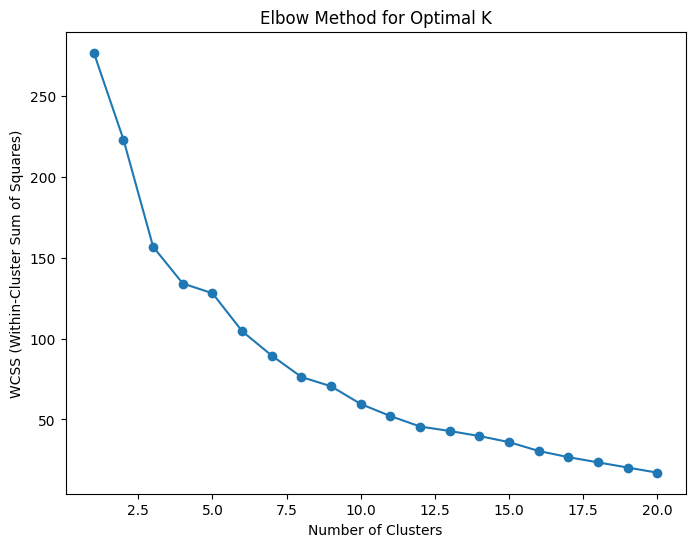

In [242]:
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

Apply KMeans with the optimal number of clusters

In [243]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(x_scaled)

Add cluster labels to the dataset

In [244]:
df['Cluster'] = y_pred

View customers in a specific cluster

In [245]:
print(df[df['Cluster'] == 2])

    Genre  Income_Range_Low  Income_Range_Medium  Age_group_Low  \
0       1               1.0                  0.0            1.0   
1       1               1.0                  0.0            1.0   
4       0               1.0                  0.0            0.0   
15      1               1.0                  0.0            1.0   
16      0               1.0                  0.0            0.0   
17      1               1.0                  0.0            1.0   
20      1               1.0                  0.0            0.0   
21      1               1.0                  0.0            1.0   
23      1               1.0                  0.0            0.0   
25      1               1.0                  0.0            0.0   
26      0               1.0                  0.0            0.0   
27      1               1.0                  0.0            0.0   
28      0               1.0                  0.0            0.0   
33      1               1.0                  0.0            1.

In [246]:
model.inertia_

17.070793650793668

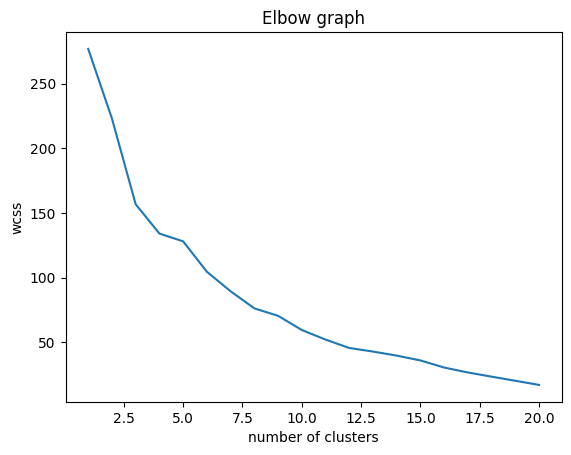

In [247]:
plt.plot(n_clusters,wcss)
plt.title("Elbow graph")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

 Calculate Silhouette Score for different K values

In [248]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, y_pred)
    silhouette_scores.append(score)

Plot Silhouette Score vs Number of Clusters

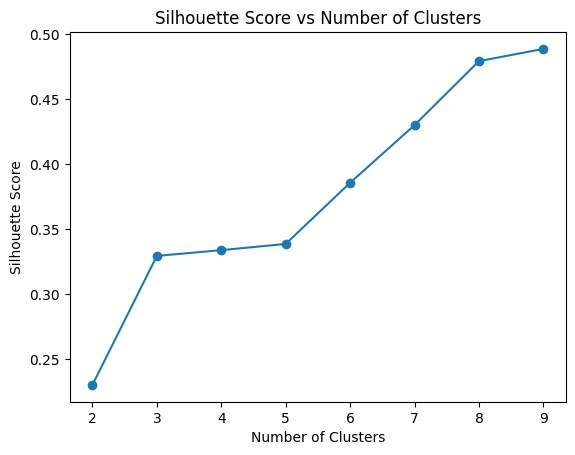

In [249]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Apply PCA to reduce features to 2D

In [250]:
pca = PCA(n_components=2)
pca_features=pca.fit_transform(x_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.32875659 0.24600783]


Plot the clusters in 2D

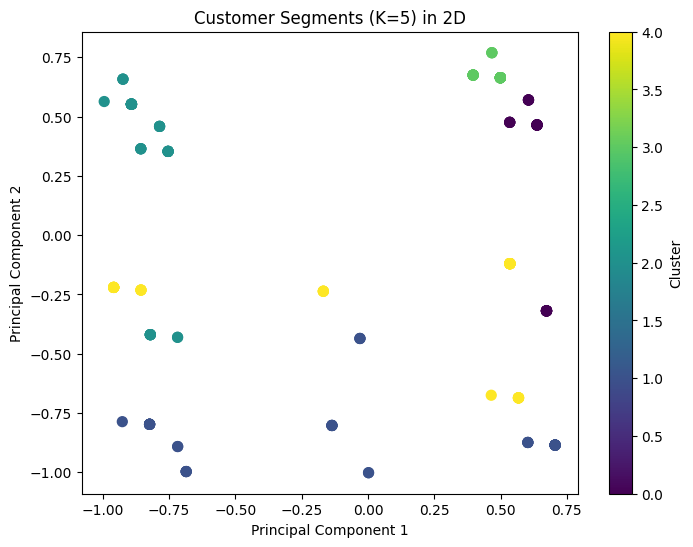

In [251]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (K=5) in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Apply PCA to reduce features to 3D for better visualization

In [252]:
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(x_scaled)

Plotting in 3D

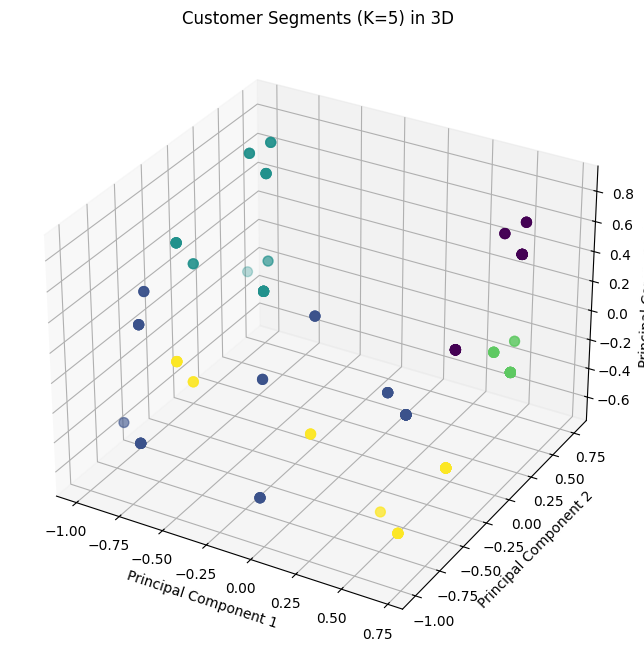

In [253]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], c=df['Cluster'], cmap='viridis', s=50)
ax.set_title('Customer Segments (K=5) in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Calculate Davies-Bouldin Index for cluster quality evaluation

In [254]:
db_score = davies_bouldin_score(x_scaled, y_pred)
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.9298310953611851


Summarize features for each cluster

In [255]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

            Genre  Income_Range_Low  Income_Range_Medium  Age_group_Low  \
Cluster                                                                   
0        1.000000          0.000000             1.000000       0.105263   
1        0.658537          0.365854             0.390244       0.121951   
2        0.489362          1.000000             0.000000       0.234043   
3        0.000000          0.000000             1.000000       0.272727   
4        0.000000          0.292683             0.609756       0.219512   

         Age_group_Senior  Score_Range_Low  Score_Range_Medium  
Cluster                                                         
0                0.131579         0.000000            0.631579  
1                0.048780         0.926829            0.000000  
2                0.148936         0.000000            0.829787  
3                0.090909         0.000000            1.000000  
4                0.000000         0.195122            0.000000  
